# Imports

In [1]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt


# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')

import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # For convenience

import pims
import trackpy as tp

'''
mp4 to jpg converter:
https://www.onlineconverter.com/mp4-to-jpg
'''

# Functions to use later

In [2]:
def trajectory(df, particle):
    
    '''
    Return x and y-coordinates of particle's trajectory throughout the sequence (DataFrame) df
    '''
    
    X = []  # x-coords
    Y = []  # y-coords
    
    for frame in df:  # frame is a dataframe containing the features in that frame
        x_pos = frame.iloc[particle]['x']
        y_pos = frame.iloc[particle]['y']
        
        X.append(x_pos)
        Y.append(y_pos)
    
    return X, Y

def translation(x1, y1, x2, y2, x3, y3, x4, y4):
    
    '''
    Inputs: 
        x1, y1 (list): coordinates of particle one
        x2, y2 (list): coordinates of particle two
        
    Returns:
        COM (list): coordinates of the center of mass
    '''
    
    # Define the center of mass (COM): [COM_xcoord, COM_ycoord]
    
    COM = [ (x1+x2+x3+x4)/4, (y1+y2+y3+y4)/4 ]
    
    return COM

def orientation(x1, y1, COMx, COMy):
    
    '''
    Return coordinates [x, y] of orientation vec pointing from center to particle/feature 1
    
    Inputs:
        x1, y1 (list): coordinates of particle one
        COMx, COMy (list): coordinates of center of mass
        
    Returns:
        orientation_vec (list): coordinates [x, y] of orientation vec
    '''
    
    orientationx = x1 - COMx
    orientationy = y1 - COMy
    norm = np.sqrt( orientationx**2 + orientationy**2 )
    COMnorm = np.sqrt( COMx**2 + COMy**2 )
    orientation_vec_x = orientationx / norm + COMx / COMnorm
    orientation_vec_y = orientationy / norm + COMy / COMnorm
    orientation_vec = [orientation_vec_x, orientation_vec_y]
    
    return orientation_vec

# Import frames

In [3]:
@pims.pipeline
def gray(image):
    return image[10:900, :, 1]

frames = gray(pims.open('/Users/darinmomayezi/Downloads/IMG-1779-2-2/*.jpg'))

# Perform particle tracking (TrackPy)

In [4]:
sequence = []
Features = pd.DataFrame()
limit = 100
for index, image in enumerate(frames):
    if index % 1 == 0:
        '''
        Filter images and locate features
        '''
        
        gamma = 150  # length of side of jack: used to determine which features are connected to the jack
        gamma0 = 45
        
        binary = image > 180  # Filtered image
        f = tp.locate(binary, diameter=11, minmass=0)  # Locate features
        Features = pd.concat([Features, f])
        
        sequence.append(binary)  # Save to image list

t = tp.link_df(Features, 100, memory=0)
t1 = tp.filter_stubs(t, len(frames))


t10 = t1.loc[t1['particle']==0]  # particle 1 trajectory
t11 = t1.loc[t1['particle']==1]  # particle 2 trajectory
t12 = t1.loc[t1['particle']==2]  # particle 3 trajectory
t13 = t1.loc[t1['particle']==3]  # particle 4 trajectory

p0x, p0y = t10['x'].values, t10['y'].values  # particle 1 coordinates
p1x, p1y = t11['x'].values, t11['y'].values  # particle 2 coordinates
p2x, p2y = t12['x'].values, t12['y'].values  # particle 3 coordinates
p3x, p3y = t13['x'].values, t13['y'].values  # particle 4 coordinates

particle1_data = pd.DataFrame(np.array([p0x, p0y]).T)  # particle 1 DataFrame
particle2_data = pd.DataFrame(np.array([p1x, p1y]).T)  # particle 2 DataFrame
particle3_data = pd.DataFrame(np.array([p2x, p2y]).T)  # particle 3 DataFrame
particle4_data = pd.DataFrame(np.array([p3x, p3y]).T)  # particle 4 DataFrame

Frame 315: 4 trajectories present.


# Save particle trajectories

In [ ]:
# Save DataFrames

particle1_data.to_csv('/Users/darinmomayezi/Documents/School/Spring 2023/SchatzLab/Data/Tracking/particle1_data.csv', 
                header=None)
particle2_data.to_csv('/Users/darinmomayezi/Documents/School/Spring 2023/SchatzLab/Data/Tracking/particle2_data.csv', 
                header=None)
particle3_data.to_csv('/Users/darinmomayezi/Documents/School/Spring 2023/SchatzLab/Data/Tracking/particle3_data.csv', 
                header=None)
particle4_data.to_csv('/Users/darinmomayezi/Documents/School/Spring 2023/SchatzLab/Data/Tracking/particle4_data.csv', 
                header=None)

# Calculate COM coordinates and orientation vector

In [6]:
# Translation of COM and orientation vec
translationsx = []  # COM x-coordinates
translationsy = []  # COM y-coordinates
orientationsx = []  # Orientation vec x-coordinates
orientationsy = []  # Orientation vec y-coordinates

for x0, y0, x1, y1, x2, y2, x3, y3 in zip(p0x, p0y, p1x, p1y, p2x, p2y, p3x, p3y):
    
    COM = translation(x0, y0, x1, y1, x2, y2, x3, y3)
    COMx, COMy = COM[0], COM[1]

    orientation_vec = orientation(x0, y0, COMx, COMy)  # points from COM to particle 1
    orientationx, orientationy = orientation_vec[0], orientation_vec[1]
    
    translationsx.append(COMx)
    translationsy.append(COMy)
    orientationsx.append(orientationx)
    orientationsy.append(orientationy)
    
COM_data = pd.DataFrame(np.array([translationsx, translationsy]).T)
orientation_data = pd.DataFrame(np.array([orientationsx, orientationsy]).T)

# Save COM and orientation data

In [ ]:
# Save COM and orientation data
COM_data.to_csv('/Users/darinmomayezi/Documents/School/Spring 2023/SchatzLab/Data/Tracking/COM_data.csv', 
                header=None)
orientation_data.to_csv('/Users/darinmomayezi/Documents/School/Spring 2023/SchatzLab/Data/Tracking/orientation_data.csv', 
                header=None)

# Plot particle trajectories on frame (choose particle to plot)

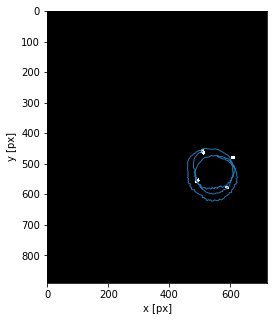

In [15]:
particle = 0  # particle to plot
tp.plot_traj(t1.loc[t1['particle']==particle], superimpose=sequence[0], colorby='particle')
# tp.annotate(Features, binary)
plt.show()

# Plot orientation vector over time

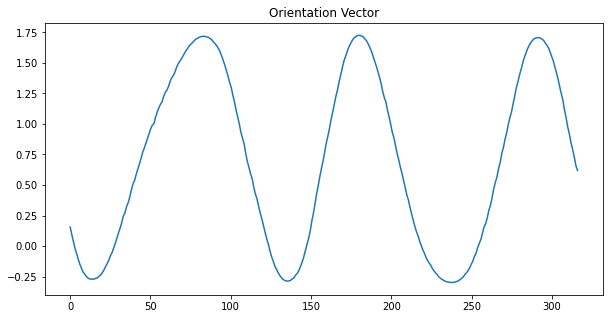

In [7]:
# Plot orientation over time
plt.plot(np.linspace(0, orientation_data.shape[0], orientation_data.shape[0]), orientation_data[0])
plt.title('Orientation Vector')
plt.show()
plt.close('all')

# Plot the radius over time
The radius remains constant as expected. The y-axis is bounded between 0 and 500 because ~500 is the length of the domain.

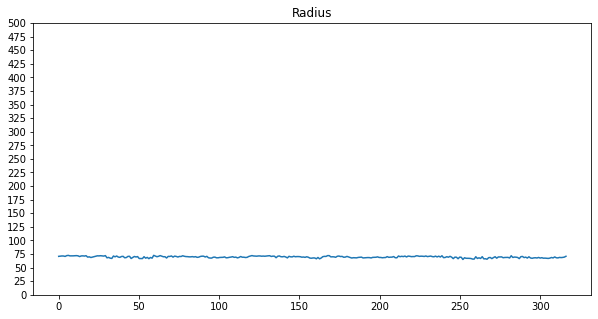

In [21]:
# Plot radius over time
difference = []
for time in range(len(p0x)):
    differentiel = np.sqrt((p0x[time] - COM_data[0][time])**2 + (p0y[time] - COM_data[1][time])**2)
    difference.append(differentiel)
plt.plot(np.linspace(0, len(p0x), len(p0x)), difference)
plt.yticks(np.linspace(0, 500, 21))
plt.title('Radius')
plt.show()
plt.close('all')

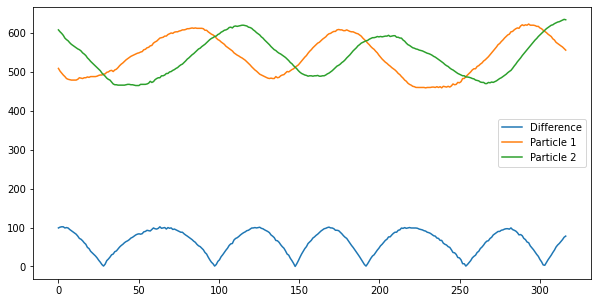

In [22]:
# Plot difference in x-positions of two arms over time

difference = []
for time_step in range(len(p0x)):
    difference.append(abs(p0x[time_step] - p1x[time_step]))
plt.plot(np.linspace(0, len(difference), len(difference)), np.array(difference), label='Difference')
plt.plot(np.linspace(0, 316, 316), p0x, label='Particle 1')
plt.plot(np.linspace(0, 316, 316), p1x, label='Particle 2')
plt.legend()
plt.show()
plt.close('all')

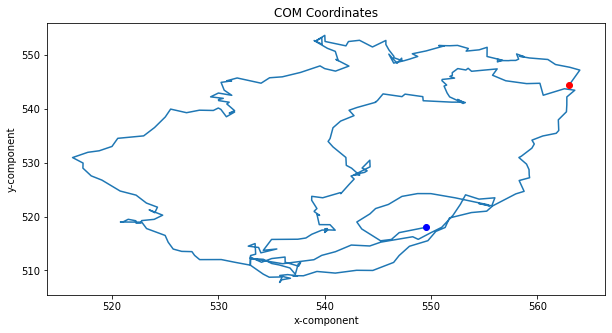

In [23]:
# Plot COM translation over time 
plt.plot(translationsx, translationsy)
plt.plot(translationsx[0], translationsy[0], marker='o', color='blue')  # Starting point
plt.plot(translationsx[-1], translationsy[-1], marker='o', color='red')  # Ending point
# plt.plot(orientationsx, orientationsy)
plt.title('COM Coordinates')
plt.ylabel('y-component')
plt.xlabel('x-component')
plt.show()
plt.close('all')